## Импорт библиотек

In [6]:
import os 
import time
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

## Объединение датасетов

In [ ]:
replacements = { # словарь содержащий исходные данные для поиска в файлах разметки датасета и данные для их замены
    '0 ': '17 ',
    '1 ': '18 ',
    '2 ': '19 ',
    '3 ': '20 ',
    '4 ': '21 ',
    '5 ': '22 ',
    '6 ': '23 '
}
old_dataset1_train_images_path = 'cervical seg/train/images' # путь к директории с изображениями для обучениядатасета №1
old_dataset1_train_labels_path = 'cervical seg/train/labels' # путь к директории со слоями для обучения датасета №1
old_dataset2_train_images_path = 'spine seg/train/images' # путь к директории с изображениями для обучения датасета №2
old_dataset2_train_labels_path = 'spine seg/train/labels' # путь к директории со слоями для обучения датасета №2

old_dataset1_valid_images_path = 'cervical seg/valid/images' # путь к директории с изображениями для валидации датасета №1
old_dataset1_valid_labels_path = 'cervical seg/valid/labels' # путь к директории со слоями для валидации датасета №1
old_dataset2_valid_images_path = 'spine seg/valid/images' # путь к директории с изображениями для валидации датасета №2
old_dataset2_valid_labels_path = 'spine seg/valid/labels' # путь к директории со слоями для валидации датасета №2

new_dataset_valid_images_path = 'vertebrae seg/valid/images' # путь к директории с изображениями для валидации объединённого датасета
new_dataset_valid_labels_path = 'vertebrae seg/valid/labels' # путь к директории со слоями для валидации объединённого датасета

new_dataset_train_images_path = 'vertebrae seg/train/images' # путь к директории с изображениями для валидации объединённого датасета
new_dataset_train_labels_path = 'vertebrae seg/train/labels' # путь к директории со слоями для валидации объединённого датасета
counter = 0
if (os.path.getsize(old_dataset1_train_labels_path) | os.path.getsize(old_dataset1_train_images_path) 
    | os.path.getsize(old_dataset2_train_labels_path) | os.path.getsize(old_dataset2_train_images_path)
    | os.path.getsize(old_dataset1_valid_labels_path) | os.path.getsize(old_dataset1_valid_images_path) 
    | os.path.getsize(old_dataset2_valid_labels_path) | os.path.getsize(old_dataset2_valid_images_path)!= 0):  # проверка на существование данных в указанных директории
    
    # Директории train
    for filename in os.listdir(old_dataset1_train_labels_path):  # цикл для изменения данных слоёв в директории train датасета 1                         
                                                                                            
        print(counter,"- Успешно!")                                                         
                                                                                            
        with open(os.path.join(old_dataset1_train_labels_path,filename), 'r') as file:      
            content = file.read()                                                                                                                           
        for old_char, new_char in replacements.items():                                     
            content = content.replace(old_char, new_char)                                                                                         
        with open(os.path.join(old_dataset1_train_labels_path,filename), 'w') as file:      
            file.write(content)                                                             

        os.rename(os.path.join(old_dataset1_train_labels_path,filename),os.path.join(new_dataset_train_labels_path,str(counter) + ".txt")) # переименование изменённого файла слоя датасета 1

        if(os.path.exists(os.path.join(new_dataset_train_labels_path,str(counter) + ".txt")) == True): # проверка на переименование изменённого файла слоя датасета 1

            for filename in os.listdir(old_dataset1_train_images_path): # цикл переименования файла изображения соотвествующий изменённому файлу слоя датасета 1
                os.rename(os.path.join(old_dataset1_train_images_path,filename),os.path.join(new_dataset_train_images_path,str(counter) + ".jpg")) # переименование файла изображения датасета 1
                if(counter == counter):
                    break  

        counter += 1    

    for filename in os.listdir(old_dataset2_train_labels_path):  # цикл для изменения данных слоёв в директории train датасета 2

        print(counter,"- Успешно!")
      
        os.rename(os.path.join(old_dataset2_train_labels_path,filename),os.path.join(new_dataset_train_labels_path,str(counter) + ".txt")) # переименование файла слоя датасета 2

        if(os.path.exists(os.path.join(new_dataset_train_labels_path,str(counter) + ".txt")) == True): # проверка на переименование файла слоя датасета 2

            for filename in os.listdir(old_dataset2_train_images_path): # цикл переименования файла изображения соотвествующий файлу слоя датасета 2
                os.rename(os.path.join(old_dataset2_train_images_path,filename),os.path.join(new_dataset_train_images_path,str(counter) + ".jpg")) # переименование файла изображения датасета 2
                if(counter == counter):
                    break    
        counter += 1  

    # Директории valid          
    for filename in os.listdir(old_dataset1_valid_labels_path): # цикл для изменения данных слоёв в директории valid датасета 1 

        print(counter,"- Успешно!")

        with open(os.path.join(old_dataset1_valid_labels_path,filename), 'r') as file:
            content = file.read()
        for old_char, new_char in replacements.items():
            content = content.replace(old_char, new_char)
        with open(os.path.join(old_dataset1_valid_labels_path,filename), 'w') as file:
            file.write(content)

        os.rename(os.path.join(old_dataset1_valid_labels_path,filename),os.path.join(new_dataset_valid_labels_path,str(counter) + ".txt")) # переименование изменённого файла слоя датасета 1

        if(os.path.exists(os.path.join(new_dataset_valid_labels_path,str(counter) + ".txt")) == True): # проверка на переименование файла слоя датасета 1

            for filename in os.listdir(old_dataset1_valid_images_path): # цикл переименования файла изображения соотвествующий файлу слоя датасета 1
                os.rename(os.path.join(old_dataset1_valid_images_path,filename),os.path.join(new_dataset_valid_images_path,str(counter) + ".jpg")) # переименование файла изображения датасета 1

                if(counter == counter):
                    break  
        counter += 1    
    for filename in os.listdir(old_dataset2_valid_labels_path): # цикл для изменения данных слоёв в директории valid датасета 2

        print(counter,"- Успешно!")
      
        os.rename(os.path.join(old_dataset2_valid_labels_path,filename),os.path.join(new_dataset_valid_labels_path,str(counter) + ".txt")) # переименование изменённого файла слоя датасета 2

        if(os.path.exists(os.path.join(new_dataset_valid_labels_path,str(counter) + ".txt")) == True): # проверка на переименование файла слоя датасета 2

            for filename in os.listdir(old_dataset2_valid_images_path):  # цикл переименования файла изображения соотвествующий файлу слоя датасета 2
                os.rename(os.path.join(old_dataset2_valid_images_path,filename),os.path.join(new_dataset_valid_images_path,str(counter) + ".jpg")) # переименование файла изображения датасета 2

                if(counter == counter):
                    break    
        counter += 1                     
else:
      print("Папка пуста! Проверьте целостность датасета.")


0 - Успешно!
1 - Успешно!
2 - Успешно!
3 - Успешно!
4 - Успешно!
5 - Успешно!
6 - Успешно!
7 - Успешно!
8 - Успешно!
9 - Успешно!
10 - Успешно!
11 - Успешно!
12 - Успешно!
13 - Успешно!
14 - Успешно!
15 - Успешно!
16 - Успешно!
17 - Успешно!
18 - Успешно!
19 - Успешно!
20 - Успешно!
21 - Успешно!
22 - Успешно!
23 - Успешно!
24 - Успешно!
25 - Успешно!
26 - Успешно!
27 - Успешно!
28 - Успешно!
29 - Успешно!
30 - Успешно!
31 - Успешно!
32 - Успешно!
33 - Успешно!
34 - Успешно!
35 - Успешно!
36 - Успешно!
37 - Успешно!
38 - Успешно!
39 - Успешно!
40 - Успешно!
41 - Успешно!
42 - Успешно!
43 - Успешно!
44 - Успешно!
45 - Успешно!
46 - Успешно!
47 - Успешно!
48 - Успешно!
49 - Успешно!
50 - Успешно!
51 - Успешно!
52 - Успешно!
53 - Успешно!
54 - Успешно!
55 - Успешно!
56 - Успешно!
57 - Успешно!
58 - Успешно!
59 - Успешно!
60 - Успешно!
61 - Успешно!
62 - Успешно!
63 - Успешно!
64 - Успешно!
65 - Успешно!
66 - Успешно!
67 - Успешно!
68 - Успешно!
69 - Успешно!
70 - Успешно!
71 - Успешно!
72

## Обучение модели

In [2]:
model = YOLO("best.pt")  # используем веса предобученой модели
results = model.train(data="vertebrae seg\data.yaml", epochs=250, imgsz=640, batch = 16) # инициализацияя обучения 

Ultralytics 8.3.223  Python-3.13.5 torch-2.9.0+cpu CPU (Intel Xeon CPU E5-2690 v3 @ 2.60GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=vertebrae seg\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=250, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

2025/11/03 06:15:25 INFO mlflow.tracking.fluent: Experiment with name '/Shared/Ultralytics' does not exist. Creating a new experiment.


MLflow: logging run_id(d43ac26a990b4b3c9c4e4d8b0026eeef) to runs\mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs\mlflow'
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to C:\Users\Mansvl\Desktop\\ai\runs\segment\train
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
      1/250         0G      1.984      4.109      3.937      1.683        132        640: 100% ━━━━━━━━━━━━ 63/63 0.2it/s 5:083.5ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 0.3it/s 10.3s.0ss
                   all         78        713       0.85     0.0787      0.129     0.0532       0.85     0.0787      0.121     0.0439

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
      2/

## Инференс модели

0035038_png.rf.1b4a713bea2e27aac0d8432d6dcc4894.jpg


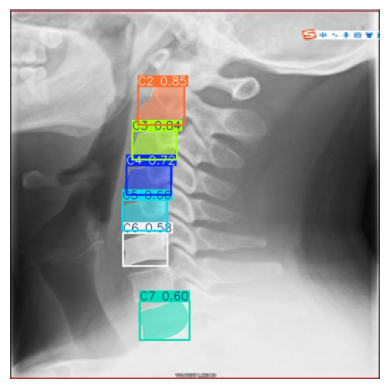

0087048_png.rf.b62b83b45306c329899ad7a10d96f559.jpg


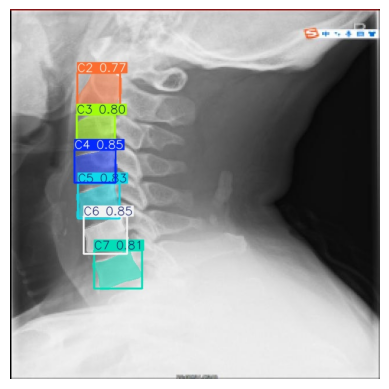

01-July-2019-17_jpg.rf.85163091e1eb2527797894d8b9069c84.jpg


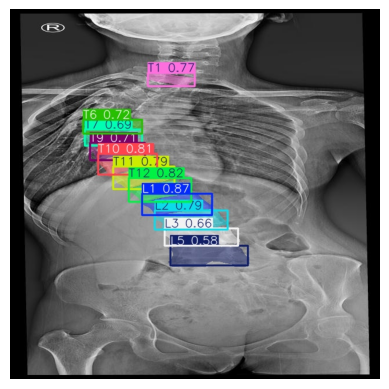

01-July-2019-25_jpg.rf.7092588ca9d47a0885e274cae4791b93.jpg


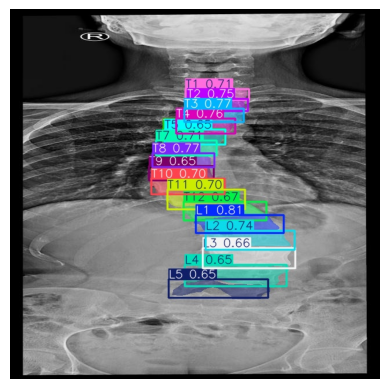

01-July-2019-33_jpg.rf.b023bf7f8c07d30390e75dd3dcae6907.jpg


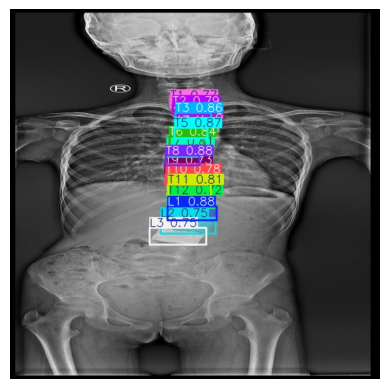

01-July-2019-44_jpg.rf.9e553099168a21b24744f699a9fc8aef.jpg


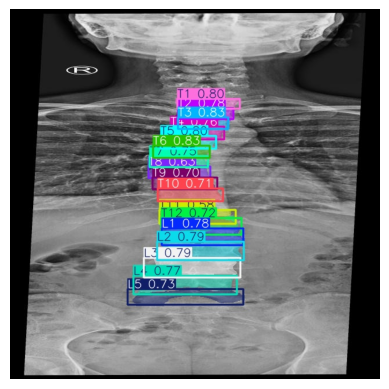

01-July-2019-45_jpg.rf.0674bb78bd135be190a1455750fad2bf.jpg


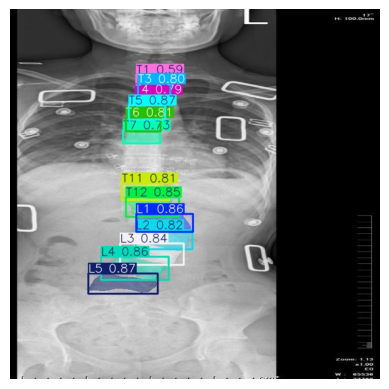

01-July-2019-64_jpg.rf.e2d48ea445cb170fe445124ed2e862a5.jpg


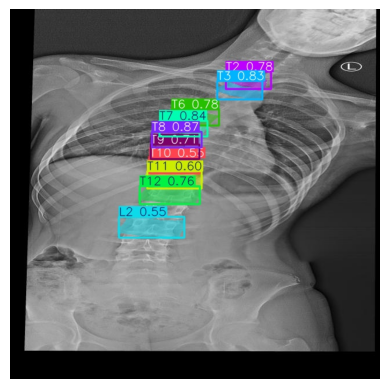

01-July-2019-65_jpg.rf.5f4146a3d40d536e1f85610663f46bb5.jpg


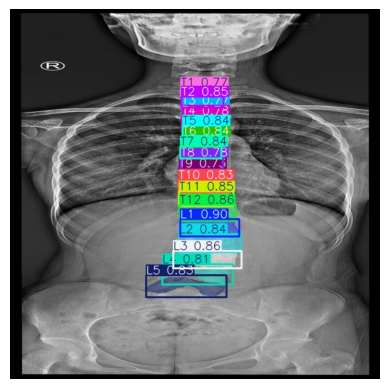

01-July-2019-82_jpg.rf.8cdffb3af0a73bafd9c357cbc1699547.jpg


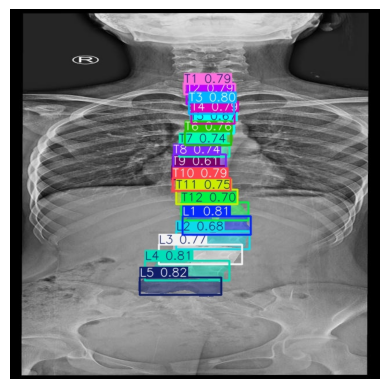

01-July-2019-83_jpg.rf.9f3e9abbe168061df8dc544b1646af54.jpg


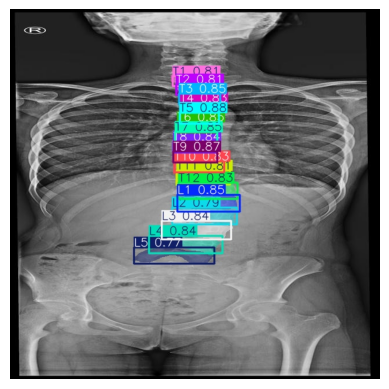

01-July-2019-8_jpg.rf.7559fa03f1386bc18093417b8b175a93.jpg


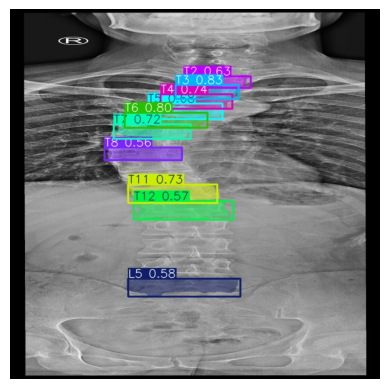

0102120_png.rf.126a1704825477d67eea25696ecb8c64.jpg


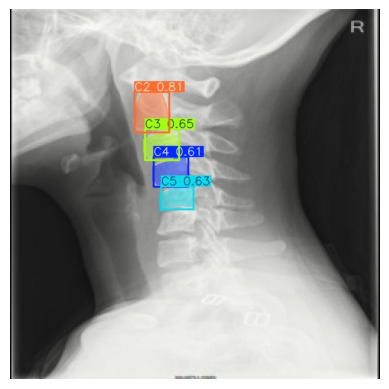

0111122_png.rf.19859110a93dc0f021a332e1ff17fe56.jpg


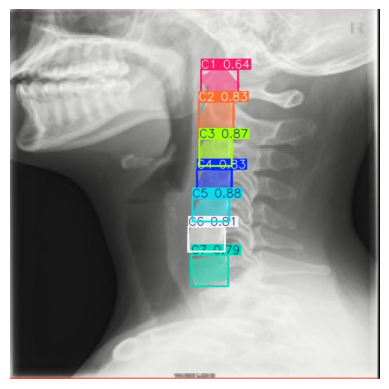

0113122_png.rf.de97088ffeeee53c4f65a8c471618763.jpg


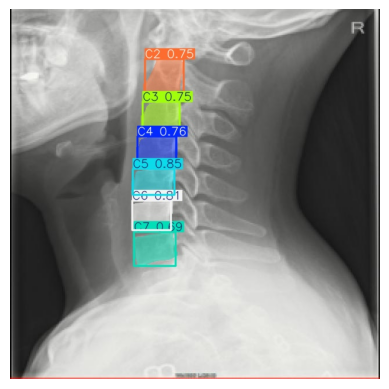

0125124_png.rf.e7a7aa76eaa1a09a864a046271c1ceff.jpg


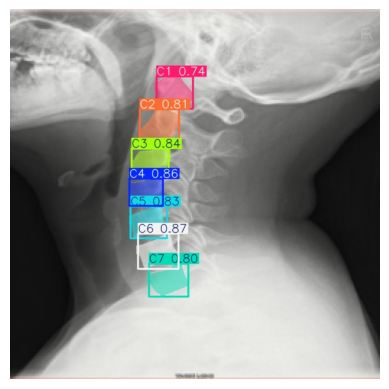

0133125_png.rf.b664efd187f4580398d99970a04de5da.jpg


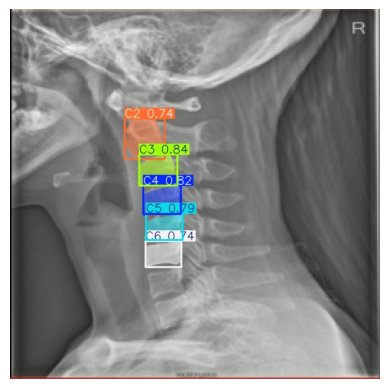

0273129_png.rf.1339ef06d154e258977f7d0fe31b14e0.jpg


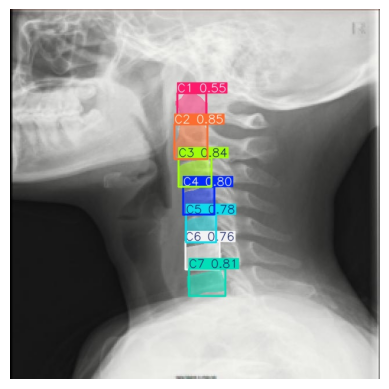

0324133_png.rf.a86d3daa229e8f7883be3f119b0d73ae.jpg


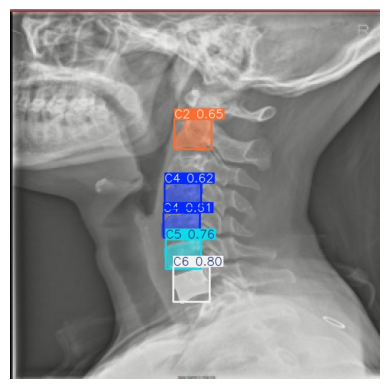

0563139_png.rf.e8a09a278a5289d72181cf2029a7d6fc.jpg


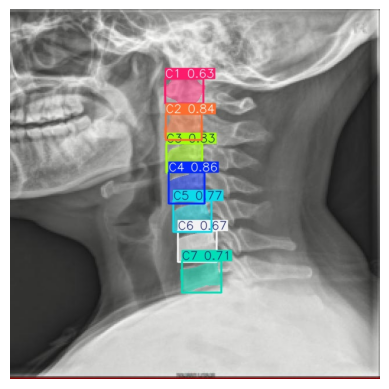

0645143_png.rf.088ac9bdaf2721c3b1378d95abaa96e2.jpg


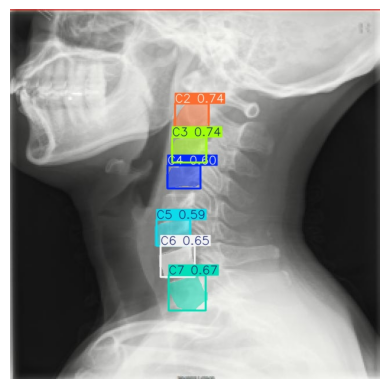

0662149_png.rf.37fc683174c94359ffb8ca21118dc5a5.jpg


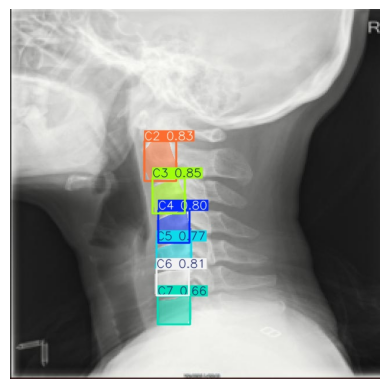

0697146_png.rf.499deb118e134cce237dafb52b8ddd8d.jpg


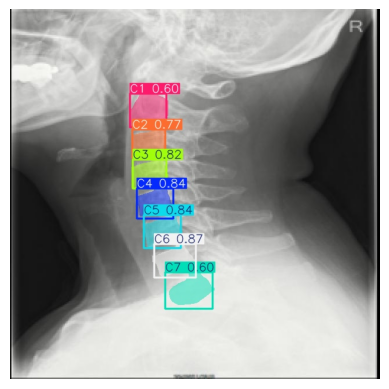

0712153_png.rf.94e3e12266218c3d5496f81f07dc2e07.jpg


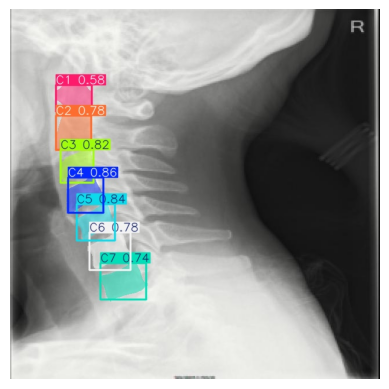

0729154_png.rf.e15908f7316f432d601fb5b0115bb03d.jpg


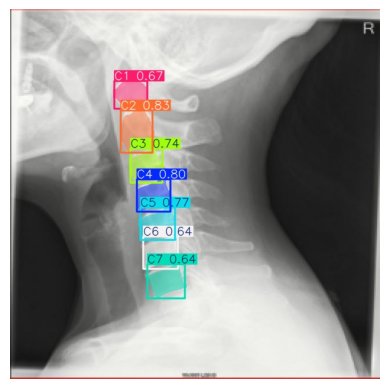

0850164_png.rf.6226be761e4151bd8e35cd886fa18741.jpg


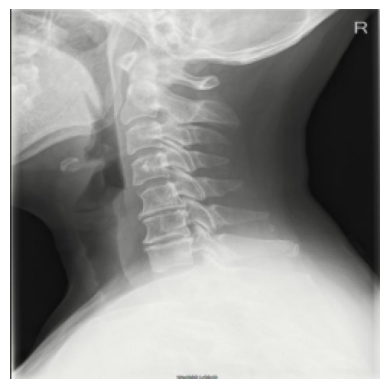

0951024_png.rf.f5c22581acd0a5c6012c57f8aaef88d5.jpg


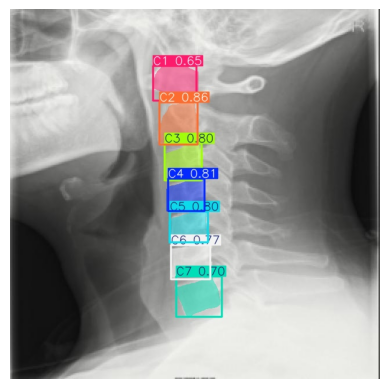

1004026_png.rf.48f4b37c670c6fdf51c483588b575e1d.jpg


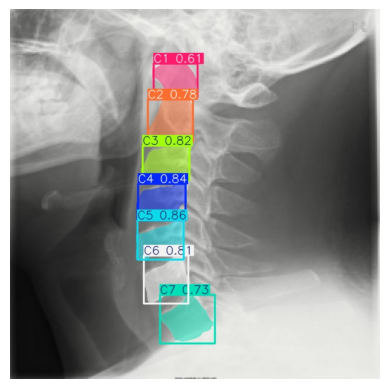

1046027_png.rf.c925ebce507a14bb6d31a8d7567dc661.jpg


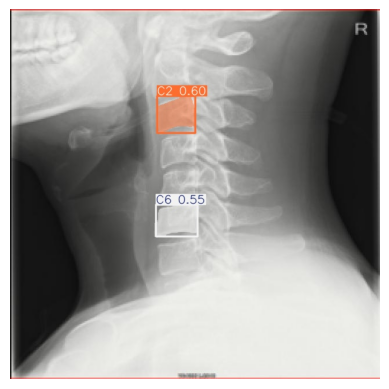

1123030_png.rf.f5bbf5f37e084a5c0dc2e60e121d888e.jpg


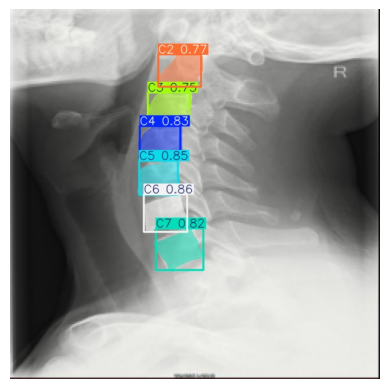

1483040_png.rf.13a357bae5b23e6ca7d07958f1a61709.jpg


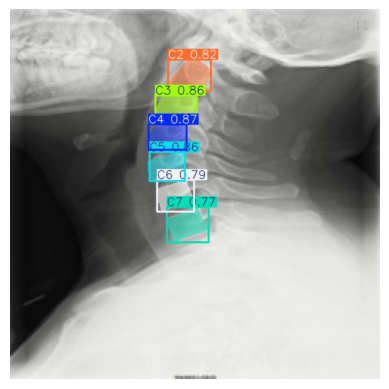

1553042_png.rf.1b3fe7818d6b576640cf7f43a3d8a368.jpg


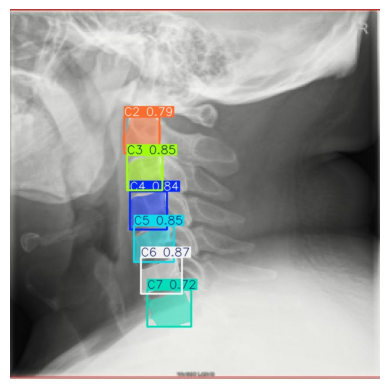

1689048_png.rf.1153e5b69359acc4d66d79b8382a1791.jpg


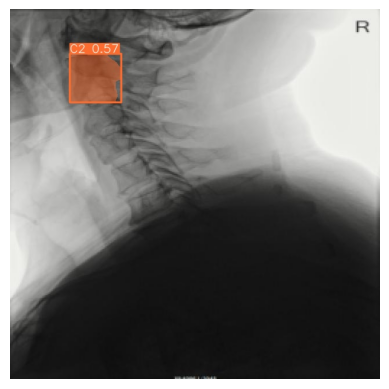

4981038_png.rf.5c0366ece2111613975061278f4cdf03.jpg


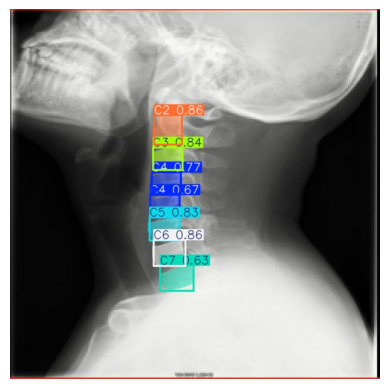

4995039_png.rf.9f89d87a19dbc4e7af60cf70a3eb9e29.jpg


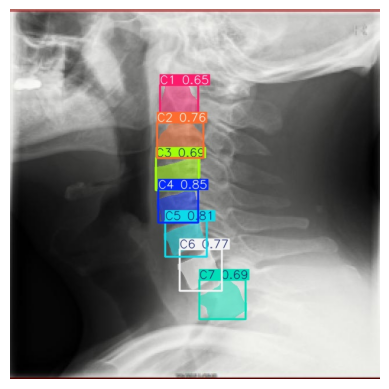

In [7]:
model = YOLO("best copy.pt") # подключаем модель с обучеными весами

folder_input_path = 'data/input' # путь к директории с входными данными для обученной модели
folder_result_path = 'data/result' # путь к директории с результатом работы обученной модели
 
if (os.path.getsize(folder_input_path) != 0):  # проверка на существование входных данных в указанной директории
    for filename in os.listdir(folder_input_path): # цикл инстанс-сегментации входных данных нейросетью
        print(filename)
        results = model(os.path.join(folder_input_path,filename), imgsz=640, iou=0.4, conf=0.55, verbose=False) # инстанс-сегментация входных данных нейросетью
        for result in results: # цикл обработки и сохранения результата работы нейросети
            masks = result.masks  
            result.save(os.path.join(folder_result_path,filename + "_result.jpg"))
            img = cv2.imread(os.path.join(folder_result_path,filename + "_result.jpg"))
            result_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(result_img)
            plt.axis('off')
            plt.show()
            time.sleep(1)
else:
      print("Папка пуста! Добавьте изображения для обработки.")